# Pandas 示例：销售数据分析全流程

以下是一个综合性的 Pandas 示例，涵盖大纲中的所有核心知识点（从基础操作到高级功能），并通过一个完整的销售数据分析项目串联起来。我们将使用模拟数据演示数据处理全流程。

## 功能需求
1. 创建和操作 DataFrame（基础操作）。
2. 数据清洗（处理缺失值、重复值、异常值）。
3. 数据类型转换与字符串处理。
4. 数据筛选、排序和聚合。
5. 分组统计与透视表。
6. 时间序列处理。
7. 性能优化技巧。
8. 数据导出与可视化（结合 Matplotlib）。

## 完整代码

原始数据：
         Date Product Region  Sales  Price
0  2023-01-01       A   East  100.0   10.5
1  2023-01-02       B   West  200.0   20.3
2  2023-01-03       A   East    NaN   15.0
3  2023-01-04       C  North  150.0   12.8
4  2023-01-05       B  South  180.0   18.2

按产品分组的统计：
         Sales         Price
           sum   mean   mean
Product                     
A        200.0  100.0  12.75
B        380.0  190.0  19.25
C        150.0  150.0  12.80

按产品和地区分组的销售总额：
  Product Region  Sales
0       A   East  200.0
1       B  South  180.0
2       B   West  200.0
3       C  North  150.0

透视表：产品 vs 地区的销售总额
Region    East  North  South   West
Product                            
A        200.0    0.0    0.0    0.0
B          0.0    0.0  180.0  200.0
C          0.0  150.0    0.0    0.0

月度销售总额：
Date
2023-01-31    730.0
Freq: ME, Name: Sales, dtype: float64

2天滑动平均销售额：
Date
2023-01-01      NaN
2023-01-02    150.0
2023-01-03    150.0
2023-01-04    125.0
2023-01-05    165.0
Name: Sales, dtype: float64

C:\Users\aa155\AppData\Local\Temp\ipykernel_12648\3374710491.py:82: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df_time['Sales'].resample('M').sum()
C:\Users\aa155\AppData\Local\Temp\ipykernel_12648\3374710491.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  product_sales = df.groupby('Product')['Sales'].sum()


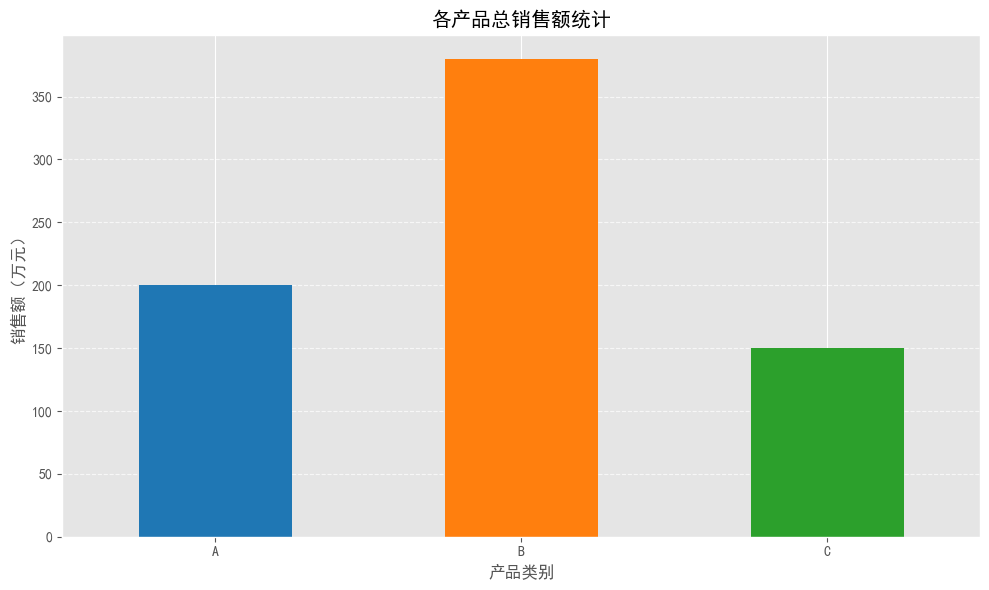

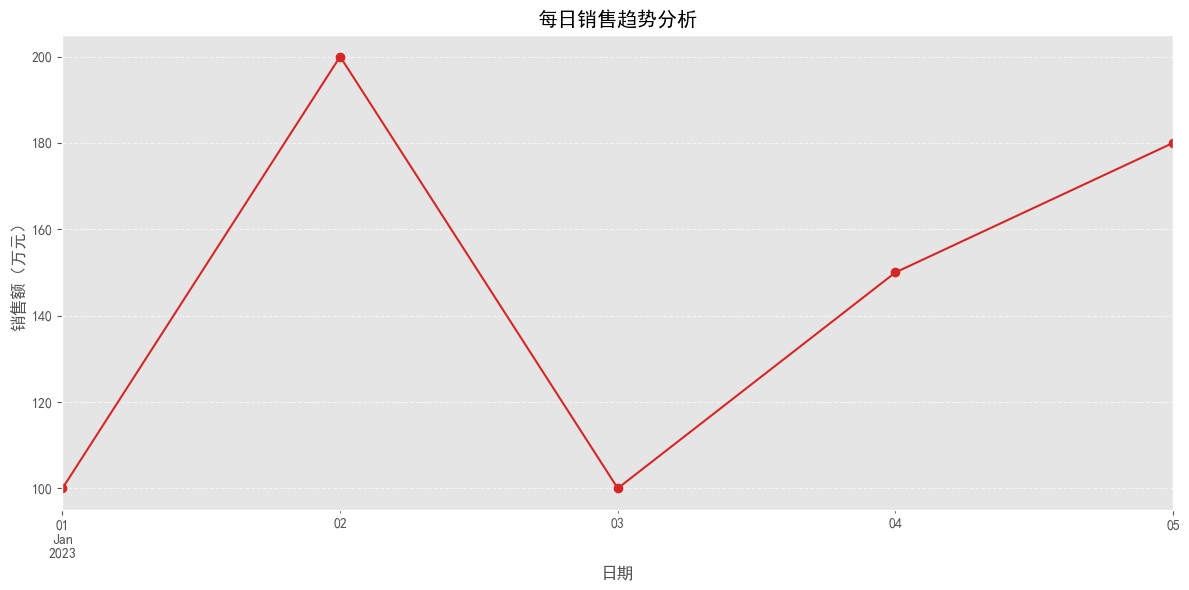

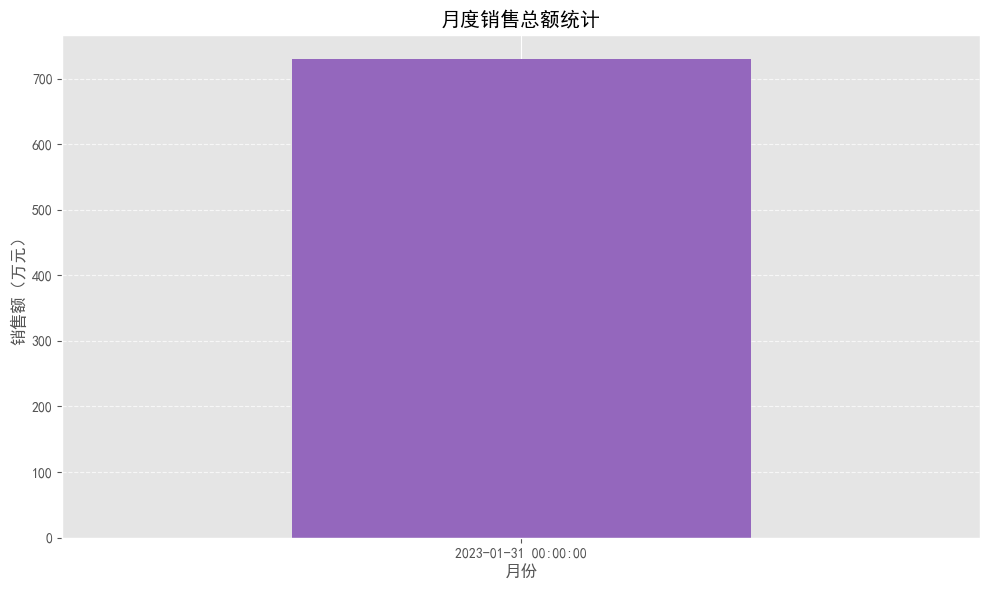

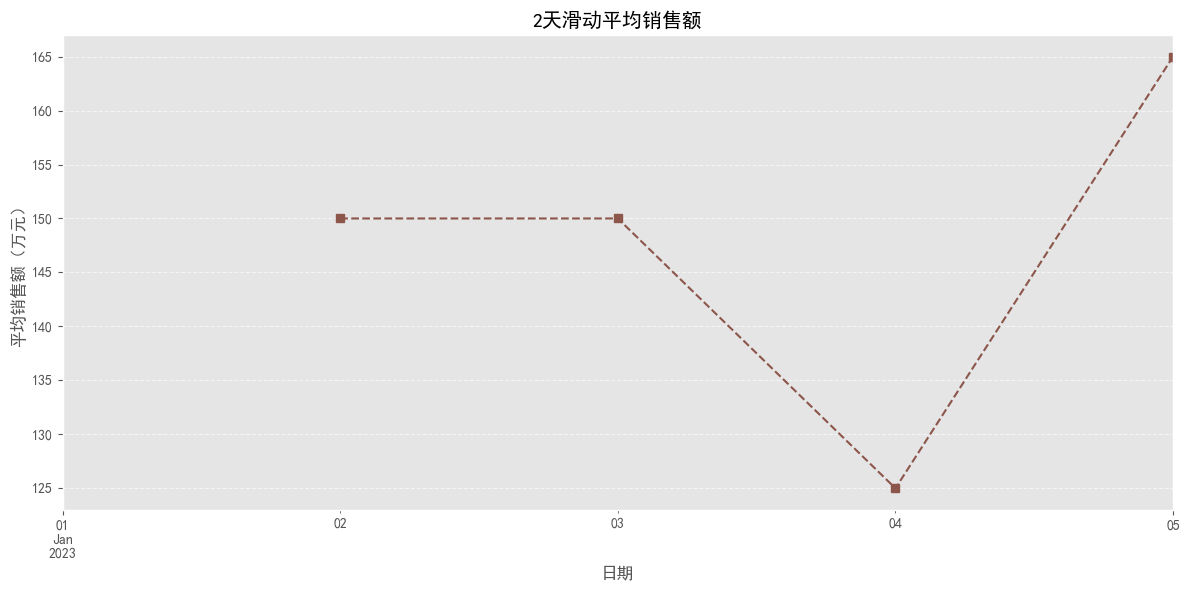

所有图表已生成并保存为PNG文件


In [5]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# 设置中文字体支持
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# ====================== 1. 基础操作 ======================
# 创建 DataFrame（模拟销售数据）
data = {
    'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
    'Product': ['A', 'B', 'A', 'C', 'B'],
    'Region': ['East', 'West', 'East', 'North', 'South'],
    'Sales': [100, 200, np.nan, 150, 180],  # 包含缺失值
    'Price': [10.5, 20.3, 15.0, 12.8, 18.2]
}
df = pd.DataFrame(data)

# 查看数据
print("原始数据：")
print(df.head())

# ====================== 2. 数据清洗 ======================
# 处理缺失值：填充销售额的缺失值为该产品的平均值
product_mean_sales = df.groupby('Product')['Sales'].transform('mean')
df['Sales'] = df['Sales'].fillna(product_mean_sales)

# 删除重复值（如果存在）
df = df.drop_duplicates()

# 处理异常值：将销售额大于200的标记为异常（假设200是合理上限）
df['Is_Outlier'] = df['Sales'] > 200

# ====================== 3. 数据类型转换与字符串处理 ======================
# 转换日期格式
df['Date'] = pd.to_datetime(df['Date'])

# 提取月份和季度
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter

# 字符串操作：将产品名称转为大写
df['Product'] = df['Product'].str.upper()

# ====================== 4. 数据筛选与排序 ======================
# 筛选东部地区的数据
east_data = df[df['Region'] == 'East']

# 筛选销售额大于150的记录
high_sales = df[df['Sales'] > 150]

# 按销售额降序排序
sorted_df = df.sort_values('Sales', ascending=False)

# ====================== 5. 数据聚合与分组 ======================
# 按产品分组计算总销售额和平均价格
product_stats = df.groupby('Product').agg({
    'Sales': ['sum', 'mean'],
    'Price': 'mean'
})
print("\n按产品分组的统计：")
print(product_stats)

# 多列分组：按产品和地区分组计算销售总额
grouped_stats = df.groupby(['Product', 'Region'])['Sales'].sum().reset_index()
print("\n按产品和地区分组的销售总额：")
print(grouped_stats)

# ====================== 6. 透视表 ======================
# 创建透视表：产品 vs 地区，汇总销售额
pivot_table = pd.pivot_table(df, values='Sales', index='Product', columns='Region', aggfunc='sum', fill_value=0)
print("\n透视表：产品 vs 地区的销售总额")
print(pivot_table)

# ====================== 7. 时间序列处理 ======================
# 设置日期为索引
df_time = df.set_index('Date')

# 按月份重采样计算月度销售总额
monthly_sales = df_time['Sales'].resample('M').sum()
print("\n月度销售总额：")
print(monthly_sales)

# 计算7天滑动平均销售额
rolling_avg = df_time['Sales'].rolling(window=2).mean()  # 窗口设为2天（示例数据较少）
print("\n2天滑动平均销售额：")
print(rolling_avg)

# ====================== 8. 性能优化 ======================
# 使用更高效的数据类型（如将字符串转换为分类类型）
df['Product'] = df['Product'].astype('category')
df['Region'] = df['Region'].astype('category')

# 避免链式赋值（推荐使用 .loc）
# 错误示范：df[df['Sales'] > 150]['Price'] = 0  # 可能无法生效
# 正确做法：
df.loc[df['Sales'] > 150, 'Price'] = 0  # 将高销售额产品的价格设为0（模拟促销）

# ====================== 9. 数据导出 ======================
# 导出为CSV
df.to_csv('sales_data_cleaned.csv', index=False)

# 导出为Excel（带多个Sheet）
with pd.ExcelWriter('sales_report.xlsx') as writer:
    df.to_excel(writer, sheet_name='原始数据', index=False)
    product_stats.to_excel(writer, sheet_name='产品统计')
    pivot_table.to_excel(writer, sheet_name='透视表')

# ====================== 10. 数据可视化 ======================
# 设置图表风格
plt.style.use('ggplot')

# 绘制产品销售额柱状图
plt.figure(figsize=(10, 6))
product_sales = df.groupby('Product')['Sales'].sum()
product_sales.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('各产品总销售额统计')
plt.xlabel('产品类别')
plt.ylabel('销售额（万元）')
plt.xticks(rotation=0)  # 不旋转x轴标签
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('各产品销售额.png', dpi=300)  # 保存高清图片
plt.show()

# 绘制时间序列折线图
plt.figure(figsize=(12, 6))
df_time['Sales'].plot(marker='o', linestyle='-', color='#d62728')
plt.title('每日销售趋势分析')
plt.xlabel('日期')
plt.ylabel('销售额（万元）')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('销售趋势图.png', dpi=300)
plt.show()

# 绘制月度销售总额柱状图
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='#9467bd')
plt.title('月度销售总额统计')
plt.xlabel('月份')
plt.ylabel('销售额（万元）')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('月度销售总额.png', dpi=300)
plt.show()

# 绘制滑动平均销售额折线图
plt.figure(figsize=(12, 6))
rolling_avg.plot(marker='s', linestyle='--', color='#8c564b')
plt.title('2天滑动平均销售额')
plt.xlabel('日期')
plt.ylabel('平均销售额（万元）')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('滑动平均销售额.png', dpi=300)
plt.show()

print("所有图表已生成并保存为PNG文件")

## 代码解析（对应大纲知识点）

| **知识点**         | **代码实现**                                                                 |
|--------------------|------------------------------------------------------------------------------|
| 基础操作           | DataFrame 创建、head() 查看数据。                                             |
| 数据清洗           | 缺失值填充 (fillna)、去重 (drop_duplicates)、异常值标记。                     |
| 数据类型转换       | to_datetime 转换日期、astype('category') 优化分类数据。                        |
| 字符串处理         | str.upper() 转换产品名称为大写。                                              |
| 数据筛选与排序     | 布尔索引 (df[df['Region'] == 'East'])、sort_values() 排序。                    |
| 数据聚合           | groupby() + agg() 分组统计。                                                  |
| 透视表             | pd.pivot_table() 多维汇总。                                                   |
| 时间序列           | resample() 重采样、rolling() 滑动窗口计算。                                   |
| 性能优化           | 分类数据类型 (astype('category'))、避免链式赋值。                              |
| 数据导出           | to_csv() 和 ExcelWriter 导出多 Sheet。                                         |
| 可视化             | matplotlib 绘制柱状图和折线图。                                               |

## 生成的文件
- **CSV 文件**：`sales_data_cleaned.csv`（清洗后的数据）。
- **Excel 报表**：`sales_report.xlsx`（包含原始数据、统计表和透视表）。
- **图片**：`sales_by_product.png` 和 `sales_trend.png`（可视化结果）。

## 如何扩展？
1. **大数据处理**：结合 Dask 或分块读取 (chunksize) 处理超大数据集。
2. **自动化报告**：用 Jupyter Notebook + Markdown 生成交互式报告。
3. **数据库集成**：从 SQL 数据库直接读取数据（pd.read_sql()）。

这个示例覆盖了 Pandas 的全流程操作，适合直接运行学习！如果有任何问题，欢迎提问。 🐼📊